# Zindi Mobile Money and Financial Inclusion in Tanzania challenge
The train dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey and prepared specifically for this challenge. More about the Finscope survey here.

Each individual is classified into four mutually exclusive categories:

- No_financial_services: Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance
- Other_only: Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)
- Mm_only: Individuals who use mobile money only
- Mm_plus: Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance) Financial Access Map

This dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT.

In [1]:
# Loading in required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [2]:
# Reading in the data
mob_money = pd.read_csv("training.csv") 
mob_money.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [3]:
# changing index cols with rename() 
_money = mob_money.rename(columns = {"Q1": "Age", 
                                  "Q2": "Gender", 
                                  "Q3": "Marital Status",
                                  "Q4": "Highest Qualification",
                                  "Q5": "Living Conditions",
                                  "Q6": "Land Ownership",
                                  "Q7": "Cellphone Ownership",
                                  "Q8_1": "Salaries/Wages",
                                  "Q8_2": "Trading",
                                  "Q8_3": "Service Provider",
                                  "Q8_4": "Piece Jobs",
                                  "Q8_5": "Rental Income",
                                  "Q8_6": "Investments",
                                  "Q8_7": "Pension",
                                  "Q8_8": "Social Welfare",
                                  "Q8_9": "Rely on Someone Else",
                                  "Q8_10": "No Money",
                                  "Q8_11": "Other",
                                  "Q9": "Employer",
                                  "Q10": "Trading Products",
                                  "Q11": "Services Provided",
                                  "Q12": "Sent Money(12months)",
                                  "Q13": "Last Sent Money",
                                  "Q14": "Received Money(12months)",
                                  "Q15": "Last Received Money",
                                  "Q16": "Mobile Money for GnS (12months)",
                                  "Q17": "Mobile Money for Bills (12months)",
                                  "Q18": "Literacy in Kiswhahili",
                                  "Q19": "Literacy in English"}) 
  
# changing columns using .columns() 
mob_money.columns = ["ID","Age", "Gender","Marital Status","Highest Qualification","Living Conditions",
                    "Land Ownership", "Cellphone Ownership", "Salaries/Wages","Trading", "Service Provider",
                    "Piece Jobs", "Rental Income","Investments", "Pension","Social Welfare",
                    "Rely on Someone Else", "No Money","Other","Employer","Trading Products",
                    "Services Provided","Sent Money(12months)","Last Sent Money","Received Money(12months)",
                    "Last Received Money","Mobile Money for GnS (12months)", "Mobile Money for Bills (12months)",
                    "Literacy in Kiswhahili","Literacy in English","Latitude","Longitude","mobile_money","savings",
                    "borrowing","insurance","mobile_money_classification"]
mob_money.columns

Index(['ID', 'Age', 'Gender', 'Marital Status', 'Highest Qualification',
       'Living Conditions', 'Land Ownership', 'Cellphone Ownership',
       'Salaries/Wages', 'Trading', 'Service Provider', 'Piece Jobs',
       'Rental Income', 'Investments', 'Pension', 'Social Welfare',
       'Rely on Someone Else', 'No Money', 'Other', 'Employer',
       'Trading Products', 'Services Provided', 'Sent Money(12months)',
       'Last Sent Money', 'Received Money(12months)', 'Last Received Money',
       'Mobile Money for GnS (12months)', 'Mobile Money for Bills (12months)',
       'Literacy in Kiswhahili', 'Literacy in English', 'Latitude',
       'Longitude', 'mobile_money', 'savings', 'borrowing', 'insurance',
       'mobile_money_classification'],
      dtype='object')

In [4]:
mob_money['Gender']= ['Female' if each==2 else 'Male' for each in mob_money['Gender']]
mob_money['Land Ownership']= ['No' if each==2 else 'Yes' for each in mob_money['Land Ownership']]
mob_money['Sent Money(12months)']= ['No' if each==2 else 'Yes' for each in mob_money['Sent Money(12months)']]
mob_money['Received Money(12months)']= ['No' if each==2 else 'Yes' for each in mob_money['Received Money(12months)']]
mob_money['Last Sent Money'] = mob_money['Last Sent Money'].map({-1: "N/A", 4: "90Days", 2: "7Days", 5: "90+Days", 3: "30Days", 6: "6Mnth+", 1: "Y/Today"})
mob_money['Last Received Money'] = mob_money['Last Received Money'].map({-1: "N/A", 5: "90+Days", 1: "Y/Today", 3: "30Days", 4: "90Days", 6: "6Mnth+", 2: "7Days"})
mob_money['Mobile Money for GnS (12months)'] = mob_money['Mobile Money for GnS (12months)'].map({-1: "N/A", 1: "Never", 4: "Monthly", 5: "LessMnthly", 3: "Weekly", 2: "Daily"})
mob_money['Mobile Money for Bills (12months)'] = mob_money['Mobile Money for Bills (12months)'].map({-1: "N/A", 4: "Monthly", 1: "Never", 2: "Daily", 5: "LessMnthly", 3: "Weekly"})
mob_money['mobile_money']= ['No' if each==0 else 'Yes' for each in mob_money['mobile_money']]
mob_money['mobile_money_classification'] = mob_money['mobile_money_classification'].map({0: "None", 3: "MM_Plus", 2: "MM_Only", 1: "Other_Only"})
mob_money['Marital Status'] = mob_money['Marital Status'].map({3: "Widowed", 1: "Married", 4: "Single", 2: "Divorced"})


In [5]:
incomes = mob_money.loc[:, 'Salaries/Wages':'Other']
incomes['mobile_money'] = mob_money['mobile_money']
incomes['Sent Money(12months)'] = mob_money['Sent Money(12months)']
incomes['Received Money(12months)'] = mob_money['Received Money(12months)']
incomes = pd.melt(incomes, id_vars = ['mobile_money', 'Sent Money(12months)', 'Received Money(12months)'], var_name='Income_Type') 
incomes = incomes[incomes['value'] == 1]
incomes.Income_Type.value_counts()
incomes.head()

,mobile_money,Sent Money(12months),Received Money(12months),Income_Type,value
1,Yes,Yes,Yes,Salaries/Wages,1
27,Yes,Yes,Yes,Salaries/Wages,1
45,Yes,No,No,Salaries/Wages,1
47,Yes,Yes,No,Salaries/Wages,1
62,Yes,No,No,Salaries/Wages,1


## Instruction 2
2. Get basic descriptive statistics for the dataset.

In [6]:
mob_money.describe()

,ID,Age,Highest Qualification,Living Conditions,Cellphone Ownership,Salaries/Wages,Trading,Service Provider,Piece Jobs,Rental Income,...,Employer,Trading Products,Services Provided,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,savings,borrowing,insurance
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,3.060051,2.548915,1.397942,0.062165,0.630110,0.058077,0.337327,0.009445,...,-0.794615,0.876092,-0.692134,1.860164,3.163378,-6.034378,35.354029,0.461517,0.432901,0.151255
std,2731.120086,16.332148,1.557779,1.534257,0.489508,0.241472,0.482809,0.233906,0.472831,0.096730,...,0.895007,2.172787,1.411600,1.351372,1.317691,2.720888,2.899511,0.498552,0.495512,0.358322
min,1.000000,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000
50%,4744.500000,35.000000,3.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,1.000000,-1.000000,1.000000,4.000000,-6.087854,35.073326,0.000000,0.000000,0.000000
75%,7105.000000,48.000000,3.000000,4.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,-1.000000,1.000000,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,0.000000
max,9459.000000,100.000000,8.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,10.000000,12.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000


## Instruction 3
3. Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

### Financial Services Accessed vs Age 

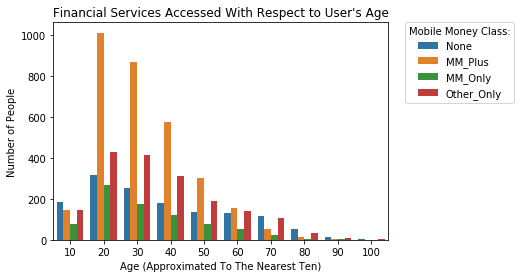

In [7]:
mob_money['age_in_tens']=mob_money['Age'].apply(lambda x : int(x/10)*10)
sns.countplot(x='age_in_tens', hue='mobile_money_classification', data = mob_money)
plt.xlabel('Age (Approximated To The Nearest Ten)')
plt.ylabel('Number of People')
plt.title("Financial Services Accessed With Respect to User's Age")
plt.legend(title = 'Mobile Money Class:', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The people in the ages between 20-30 seem to have quite a high level of activity when it comes to using mobile money only services. They are alos amongst the highest number of people who use mobile money services as well as other services to circulate money. This could be mainly due to the fact that young people are more tech savvy than adults, in general, as tyechnology advances, it's usually the youngest who are mainly interested.

### Financial Services Accessed vs Gender

Text(24.84213541666667, 0.5, 'Number of People')

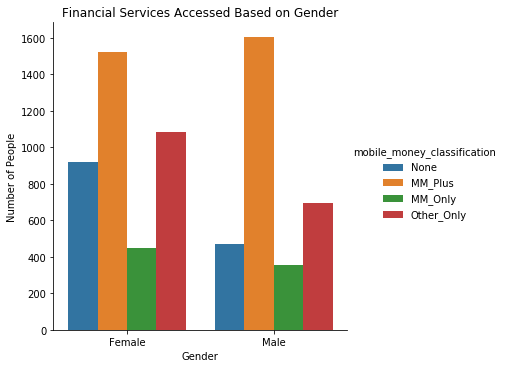

In [8]:
sns.catplot(x = "Gender", kind = 'count', hue = "mobile_money_classification", data = mob_money)
plt.title('Financial Services Accessed Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')

There seems to be generally more females than males who use mobile money, as well as other forms of money circulation methods. This could be due to the fact that many women have to take care of family and make sure money circulates to their children, and possibly extended family. The majority of men seem to use other forms of money circulation methods except mobile money, which begs the question of whether or not men are equipped with the knowledge and ability of technical services of money.

### Financial Services Accessed vs Marital Status

Text(24.894522569444447, 0.5, 'Number of People')

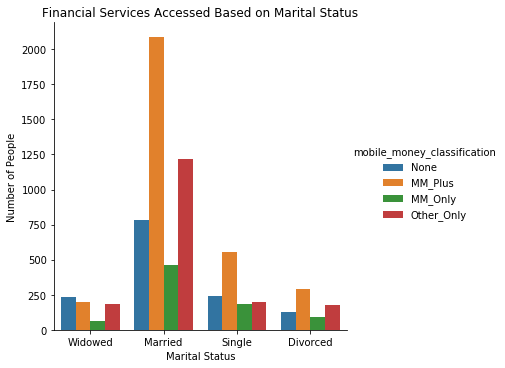

In [9]:
sns.catplot(x = "Marital Status", kind = 'count', hue = "mobile_money_classification", data = mob_money)
plt.title('Financial Services Accessed Based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of People')

When we look at the x-axis, we can see how the number of people who use mobile money only are divorced, followed by those who are married. Going back to the other two aspects we previously observed, i.e. Age and Gender, we noticed how most mobile money users are in their mid-to-late thirties, and we also noticed how most of them are female. Now we are seeing that most of them are either divorced or married. This can just simply bring about the conclusion that as women get older, they are faced with many responsibilities, not only of money flow in the family, but as well as taking care of certain needs in the family, which makes sense for most of them to opt into using mobile money, as a form of bringing about some sense of ease with all the amount of responsibilities that need to be taken care of.

### Financial Services Accessed vs Land Ownership

Text(24.84213541666667, 0.5, 'Number of People')

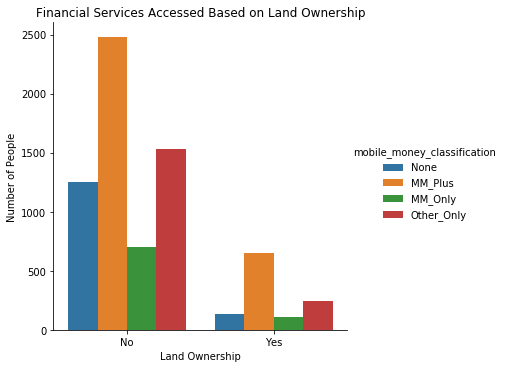

In [10]:
sns.catplot(x = "Land Ownership", kind = 'count', hue = "mobile_money_classification", data = mob_money)
plt.title('Financial Services Accessed Based on Land Ownership')
plt.xlabel('Land Ownership')
plt.ylabel('Number of People')

We are trying to find out whether or not people owning land affects their usage of mobile money. Most people without land ownership actually use mobile money more than those who own land. This could be due to payment of bills such as rent, water and electricity, parking, etc.

### Financial Services Accessed vs Type of Income

Text(0, 0.5, 'Type of Income')

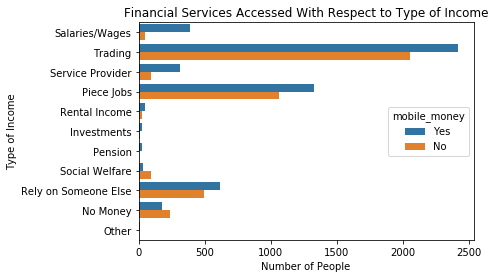

In [11]:
sns.countplot(y = incomes.Income_Type, hue = 'mobile_money', data = incomes)
plt.title('Financial Services Accessed With Respect to Type of Income')
plt.xlabel('Number of People')
plt.ylabel('Type of Income')

It seems as though, many people that took part in this survey make a living from Trading. It makes sense for mobile money services to be highly used in the category of traders. This is shortly followed by the people who make a living from piece jobs, which also makes sense since there isn't stability but there's frequency in money circulation. I did not expect people who make a living from salaries and wages to be amongst the lower range of mobile money users, however, they do have a vast majority of them using mobile money services. Which makes perfect sense because in most cases, one who earns a salary would probably need to have some bankimg details and an app that corresponds.

## Instruction 4
4. Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

### How Often Financial Services Accessed vs Age

/home/recruit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


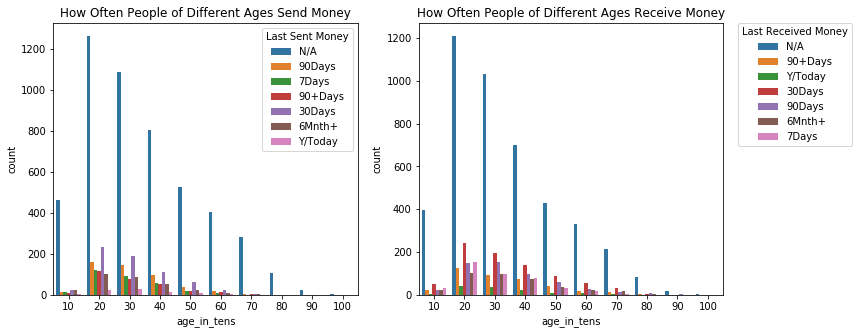

In [30]:
fig, ax =plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(x = "age_in_tens", hue = "Last Sent Money", data = mob_money, ax=ax[0])
sns.countplot(x = "age_in_tens", hue = "Last Received Money", data = mob_money, ax=ax[1])
ax[0].legend(title = 'Last Sent Money', loc = "upper right")
ax[1].legend(title = 'Last Received Money', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[0].set_title("How Often People of Different Ages Send Money")
ax[1].set_title("How Often People of Different Ages Receive Money")
fig.show()

Again, we see how money is mostly circulating amongst the youth and young adults. It makes sense since this is an age where they begin to have responsibilities piling up, personal and "black tax" being a major financial "setback". They would probably need to manage their money income and outgoing transactions in a much quicker and efficient manner, i.e, mobile money services.

/home/recruit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


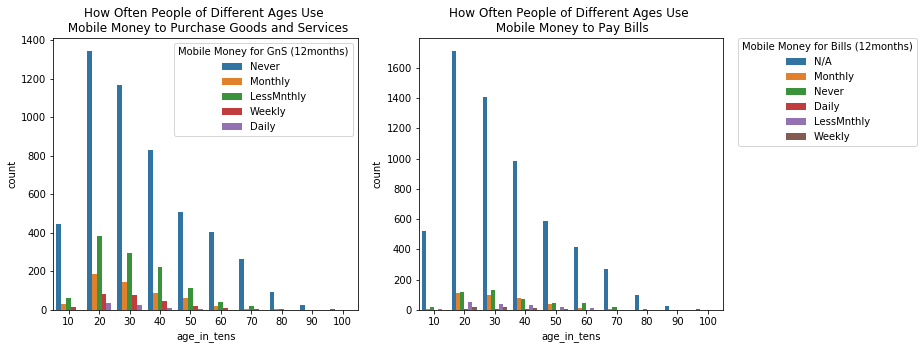

In [43]:
fig, ax =plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(x = "age_in_tens", hue = "Mobile Money for GnS (12months)", data = mob_money, ax=ax[0])
sns.countplot(x = "age_in_tens", hue = "Mobile Money for Bills (12months)", data = mob_money, ax=ax[1])
ax[0].legend(title = 'Mobile Money for GnS (12months)', loc = "upper right")
ax[1].legend(title = 'Mobile Money for Bills (12months)', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[0].set_title("How Often People of Different Ages Use \n Mobile Money to Purchase Goods and Services")
ax[1].set_title("How Often People of Different Ages Use \n Mobile Money to Pay Bills")
fig.show()


Again, we are seeing how often young people (between the ages 20-40) use mobile money services everyday and every week, often times, even frequent use within a month. More often for goods and services as opposed to bills. As for bills, these are mostly paid on a monthly basis, which makes sense that young people would be paying things such as water bills and electric bills on a monthly basis as opposed to goods and services which are consumable on a daily basis.

### How Often Financial Services Accessed vs Gender

/home/recruit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


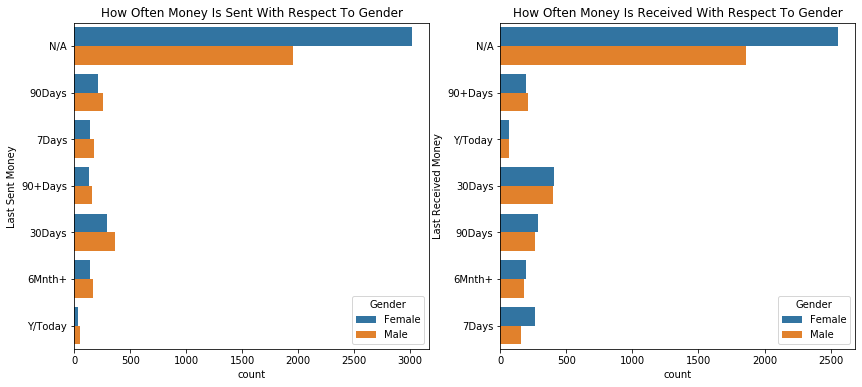

In [31]:
fig, ax =plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(y = "Last Sent Money", hue = "Gender", data = mob_money, ax=ax[0])
sns.countplot(y = "Last Received Money", hue = "Gender", data = mob_money, ax=ax[1])
ax[0].set_title("How Often Money Is Sent With Respect To Gender")
ax[1].set_title("How Often Money Is Received With Respect To Gender")
fig.show()

We are seeing a relationship where men are mostly sending money as opposed to women. Women are mostly on the receiving end of money. This could be due to people who are within relationships (Married). Men would tend to send money to their respective spouses, with an understanding that women are heavy spenders, or women are mostly responsible to purchase goods and services within a household so men would just then send the money to their respective wives for these purposes. 

/home/recruit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


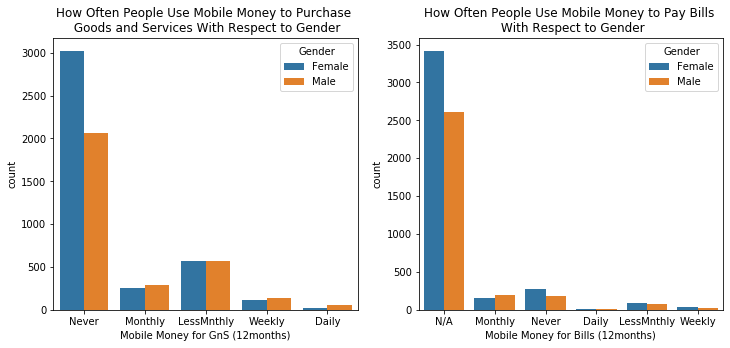

In [44]:
fig, ax =plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(x = "Mobile Money for GnS (12months)", hue = "Gender", data = mob_money, ax=ax[0])
sns.countplot(x = "Mobile Money for Bills (12months)", hue = "Gender", data = mob_money, ax=ax[1])
ax[0].set_title("How Often People Use Mobile Money to Purchase \n Goods and Services With Respect to Gender")
ax[1].set_title("How Often People Use Mobile Money to Pay Bills \n With Respect to Gender")
fig.show()

This somewhat proves my previous assumptions to be slightly true, since we can still observe a great number of females who use mobile money services to purchase goods and services, however, we still observe men being slightly higher than women on this end. This could be due to the fact that some men would be spending on meals "daily" at their workplaces, also, some men could just be quite unfaithful to their respective spouses, since they are spending money mostly on a daily and weekly basis.

On the other hand, men are paying monthly bills more than women. This makes sense as bills would, in most cases, be the men's responsibility in a household.

### How Often Financial Services Accessed vs Marital Status

/home/recruit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


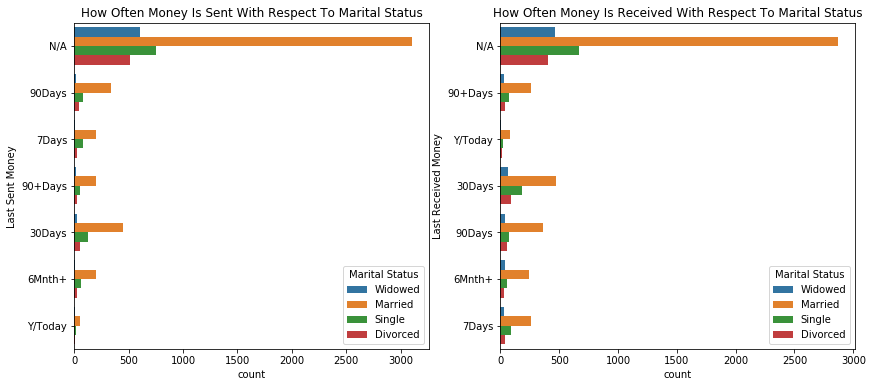

In [32]:
fig, ax =plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(y = "Last Sent Money", hue = "Marital Status", data = mob_money, ax=ax[0])
sns.countplot(y = "Last Received Money", hue = "Marital Status", data = mob_money, ax=ax[1])
ax[0].set_title("How Often Money Is Sent With Respect To Marital Status")
ax[1].set_title("How Often Money Is Received With Respect To Marital Status")
fig.show()

In the previous graphs, I was making assumptions of whether or not people of different gender send/receive money mostly due to their relationship status. I had made an assumption that money probably circulates mostly in marriage households, and the two above graphs prove my assumption to be true. The bars of married people on both the sending and receiving ends are the highest for all occassions, be it within the day of this data collection, the week, the month, 6months and more, it's the married people who are sending and receiving money.

Assuming most of these are young couples, seeing that in the previous graphs pertaining to age, it was mostly the younger ones ion the group who use mobile money the most. This could be due to the fact that young people have more responsibilities, finding new homes, having young kids, paying caretakers, schools. Responsibilities seem to pile up at a young adult age, especially when one is also married and starting a new family. 

Mobile money would definitely make these young families lives easier.

/home/recruit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


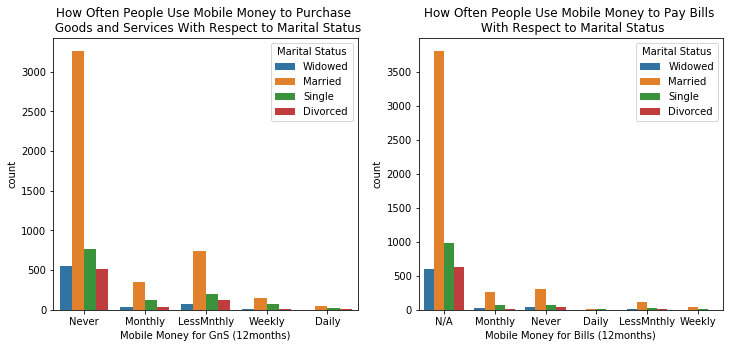

In [45]:
fig, ax =plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(x = "Mobile Money for GnS (12months)", hue = "Marital Status", data = mob_money, ax=ax[0])
sns.countplot(x = "Mobile Money for Bills (12months)", hue = "Marital Status", data = mob_money, ax=ax[1])
ax[0].set_title("How Often People Use Mobile Money to Purchase \n Goods and Services With Respect to Marital Status")
ax[1].set_title("How Often People Use Mobile Money to Pay Bills \n With Respect to Marital Status")
fig.show()

Again, referring back to the previous statement. It is quite evident that married people have more responsibilities as opposed to people who are not married. Continuing with the assumption of the Age, these could be mostly young couples paying bills and purchasing goods and services more often than others.

### How Often Financial Services Accessed vs Land Ownership

/home/recruit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


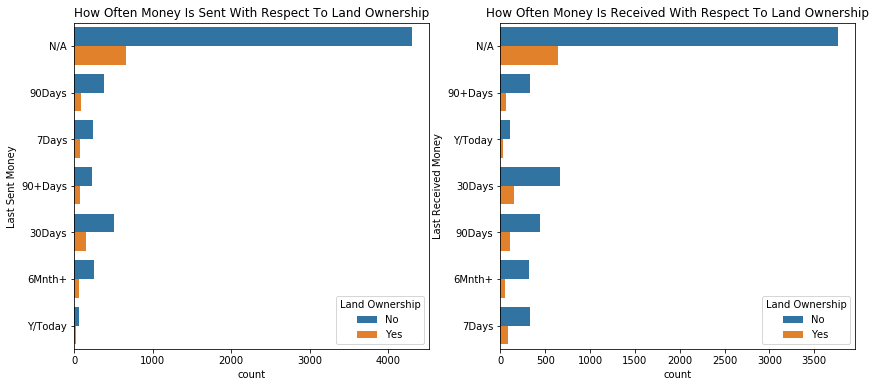

In [35]:
fig, ax =plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(y = "Last Sent Money", hue = "Land Ownership", data = mob_money, ax=ax[0])
sns.countplot(y = "Last Received Money", hue = "Land Ownership", data = mob_money, ax=ax[1])
ax[0].set_title("How Often Money Is Sent With Respect To Land Ownership")
ax[1].set_title("How Often Money Is Received With Respect To Land Ownership")
ax[0].legend(title = "Land Ownership", loc = "lower right")
fig.show()

We notice that it is mostly people who do not own land that actually send and recieve money the most.

Looking back into the previous graphs, we notices it was amongst the younges that money was being sent and received the most, it was amongst the married young couples, and now we also realise that most of them don't own land.

/home/recruit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


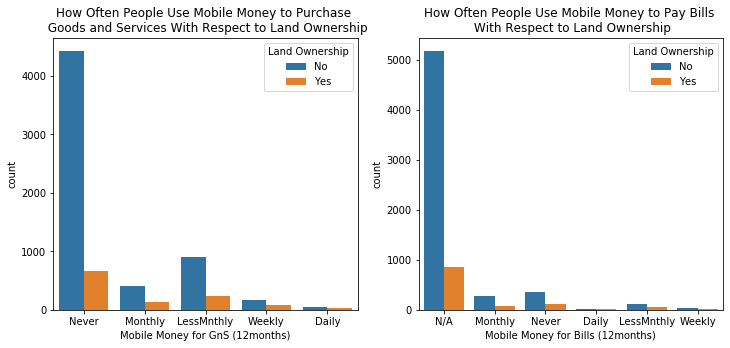

In [46]:
fig, ax =plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(x = "Mobile Money for GnS (12months)", hue = "Land Ownership", data = mob_money, ax=ax[0])
sns.countplot(x = "Mobile Money for Bills (12months)", hue = "Land Ownership", data = mob_money, ax=ax[1])
ax[0].set_title("How Often People Use Mobile Money to Purchase \n Goods and Services With Respect to Land Ownership")
ax[1].set_title("How Often People Use Mobile Money to Pay Bills \n With Respect to Land Ownership")
fig.show()

It makes perefect sense that it is the young married people without land that actually use mobile money services more often than others to purchase goods and services as well as to pay bills. My assumption is that, most of them are renting, hence they would need to pay rent, parking, water and electricity bills, and some also do expereince "Black Tax", where they need to take care of their parents and some extended family members, as well as start their new immediate familoies and still take care of that and the responsibilities thereof.

### How Often Financial Services Accessed vs Type of Income

/home/recruit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


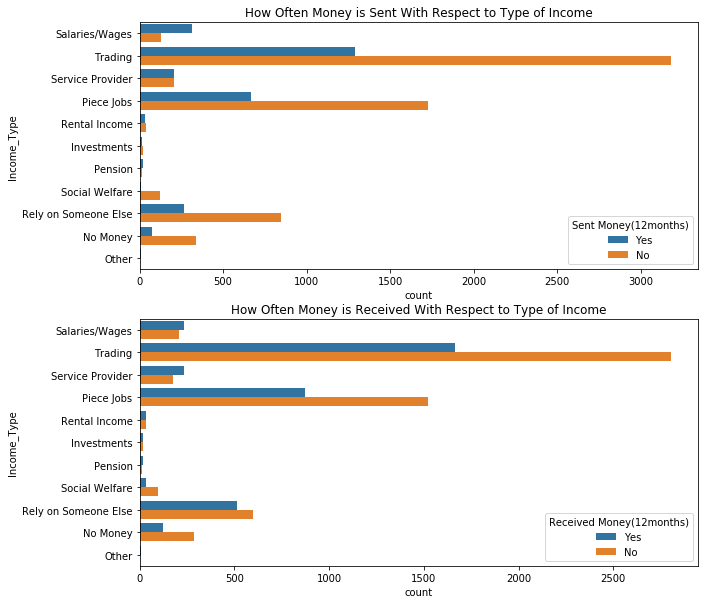

In [37]:
fig, ax =plt.subplots(2, 1, figsize = (10, 10))
sns.countplot(y = incomes.Income_Type, hue = 'Sent Money(12months)', data = incomes, ax=ax[0])
sns.countplot(y = incomes.Income_Type, hue = 'Received Money(12months)', data = incomes, ax=ax[1])
ax[0].set_title('How Often Money is Sent With Respect to Type of Income')
ax[1].set_title('How Often Money is Received With Respect to Type of Income')
fig.show()

Again, we are seeing that most people asked in this survey are traders, They are still amongst the highest in terms of receiving and sending money. Although, we do also realise that people who earn salaries and wages actually send money more than they receive it. This could be due to the fact that they have bills to pay and monthly transactions to take care of.We also notice that service providers are recieving more than sending money, this could be because most service providers don't need much to maintain their business, mainly just skills, and equipment which is barely renewed. 

In [21]:
income = mob_money[(mob_money["Salaries/Wages"] == 1) | (mob_money["Trading"] == 1) | (mob_money["Service Provider"] == 1) | (mob_money["Piece Jobs"] == 1) | (mob_money["Rely on Someone Else"] == 1) | (mob_money["No Money"] == 1)]
len(income)

7041

In [22]:
maps = folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)
marker_cluster = MarkerCluster().add_to(maps)
for lat, long in zip(income.Latitude, income.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
maps

### Conclusion

In conclusion, we realised that many people who took part in this survey are people who are traders, as well as people who get piece jobs in order to make a living. We then also realise that most of these people are young, between the ages of 20 and 40. These young people are also married, probably still fresh into the marraige and family life, since they seem to use money quite a lot. 

This group of people really sparked my interest due to the amount of assumptions I was able to come up with, and how it made a lot of sense why these people would be tech savvy enough and view the usage of mobile money to be extremely helpful and as a young group of people, I can relate with the need to hace life being easier to live, thus, mobile money being the best plausible option to use in order to make life easier.